## Imports

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

In [64]:
df = pd.read_csv('Исходные данные.csv', sep=';', decimal=',', index_col=0, parse_dates=['DT'])
df = df.set_index('nplv').sort_values('DT')
df.head()

,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
nplv,,,,,,,,,,,,,,,,,,,,,
г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,0.456460,0.059572,...,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,0.359285,0.083738,...,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,0.331665,0.081490,...,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,0.377945,0.133194,...,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
г683863<889,2070-06-21 03:50:00,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,0.389875,0.105094,...,0.12,2.4,NaN,NaN,60.3,0.6,4.5,0.09,2.5,NaN


In [65]:
# самая популярная марка — Э76ХФ
df.groupby('МАРКА')[['произв  количество плавок', 'произв количество плавок (цел)']].agg(sum)

,произв количество плавок,произв количество плавок (цел)
МАРКА,,
09Г2С,1.0,1.0
900А,52.0,52.0
G2HH,34.0,34.0
R260,33.0,33.0
R350HT,53.0,53.0
НХ,7.0,7.0
С255,1.0,1.0
С345,2.0,2.0
С355,1.0,1.0


In [66]:
df = df[df['МАРКА'] == 'Э76ХФ'] # оставляем самую популярную

In [67]:
cols_to_drop = ['МАРКА', # уже не нужно, а ниже — с большим числом пропусков
                'ферспл FeSi-75', 'сыпуч  кокс. мелочь (сух.)', 'сыпуч кварцит',
                'ферспл FeMo', 'ферспл  Ni H1 пласт.', 'ферспл FeV азот.',
                'расход C пров.', 'ферспл  ферванит', 'N2 (интенс.)', 'расход газ  N2']

df.drop(cols_to_drop, axis=1, inplace=True)

In [68]:
# заменяем nan на 0 только химанализ с третью пропусков, как просят в задании
cols_to_null = ['химшлак первый Al2O3_1', 'химшлак первый SiO2_1']

df[cols_to_null] = df[cols_to_null].fillna(0)

In [70]:
len(df.columns)

72

## EDA

In [71]:
TARGETS = ['химшлак последний Al2O3', 'химшлак последний CaO',
           'химшлак последний R', 'химшлак последний SiO2']

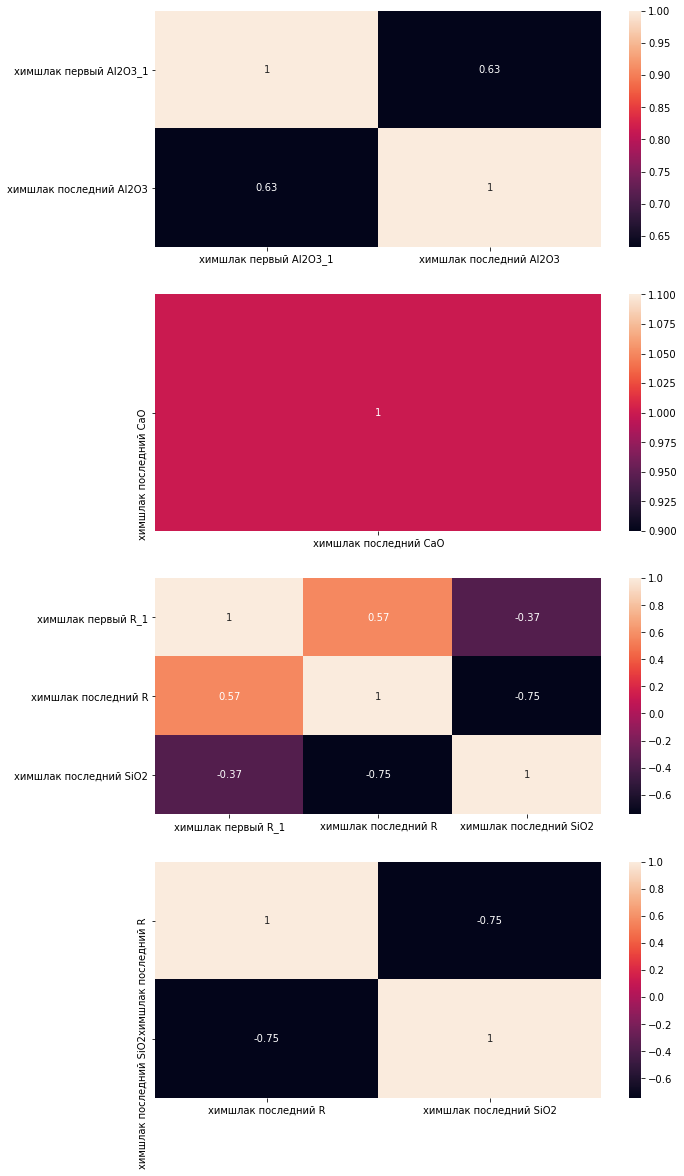

In [220]:
fig,ax = plt.subplots(4, figsize=(10,20))
for i,tar in enumerate(TARGETS):
    corr = df.corr()
    condition = (corr[tar] > 0.5) | (corr[tar] < -0.5)
    top_corr = corr.loc[condition, condition]
    sns.heatmap(top_corr, ax=ax[i], annot=True)

**Химшлак последний R** отрицательно коррелирует с **Химшлак последний SiO2**!

In [242]:
NUMERICAL = df.select_dtypes(exclude=['category', 'object', 'datetime64']).columns.tolist()
for tar in TARGETS:
    if tar in NUMERICAL:
        NUMERICAL.remove(tar)

In [243]:
len(NUMERICAL)

66

<Figure size 432x288 with 0 Axes>

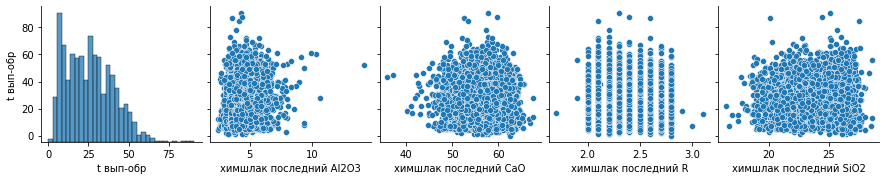

<Figure size 432x288 with 0 Axes>

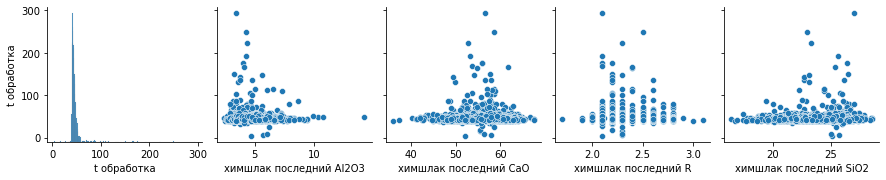

<Figure size 432x288 with 0 Axes>

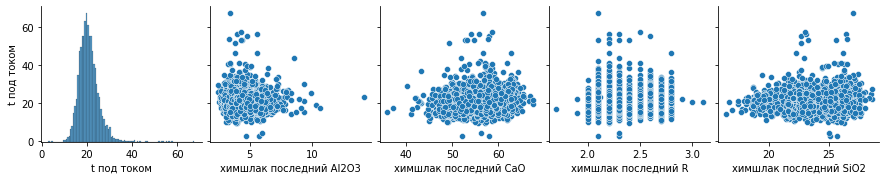

<Figure size 432x288 with 0 Axes>

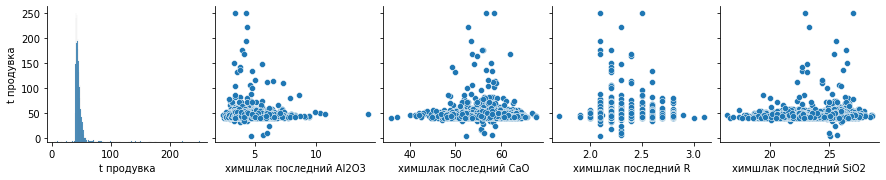

<Figure size 432x288 with 0 Axes>

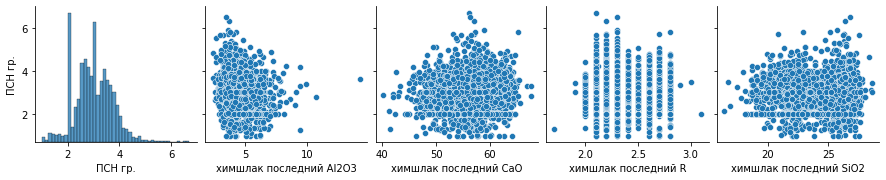

<Figure size 432x288 with 0 Axes>

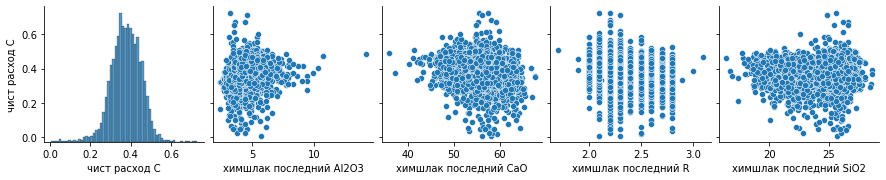

<Figure size 432x288 with 0 Axes>

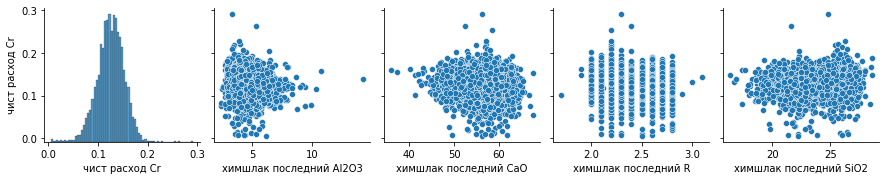

<Figure size 432x288 with 0 Axes>

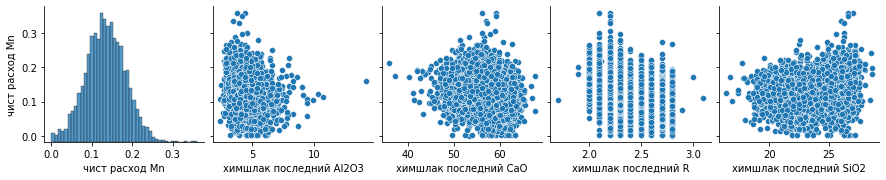

<Figure size 432x288 with 0 Axes>

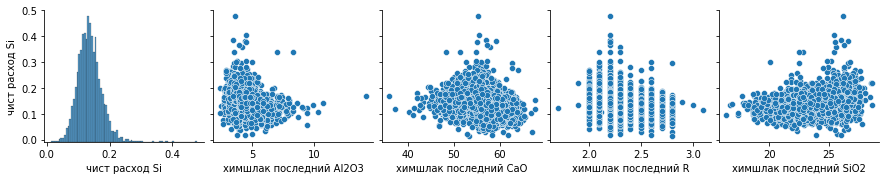

<Figure size 432x288 with 0 Axes>

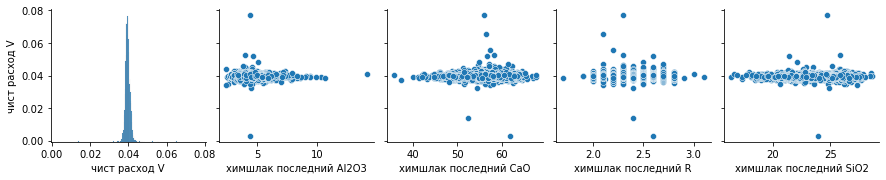

<Figure size 432x288 with 0 Axes>

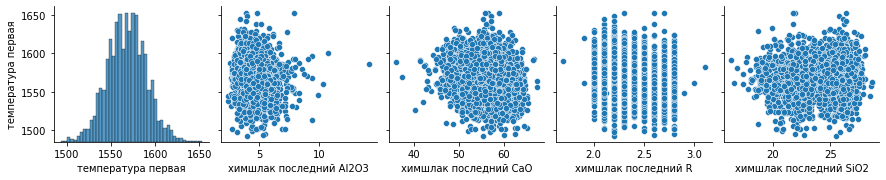

<Figure size 432x288 with 0 Axes>

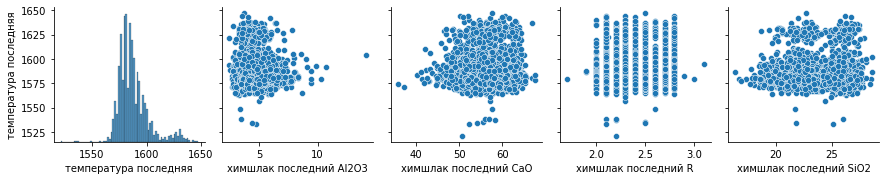

<Figure size 432x288 with 0 Axes>

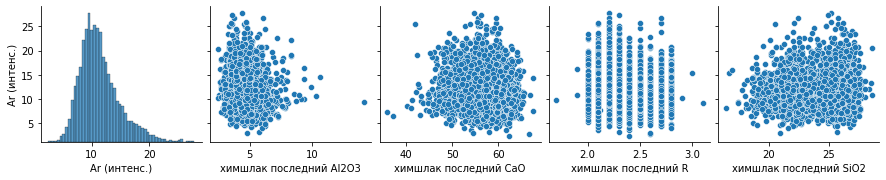

<Figure size 432x288 with 0 Axes>

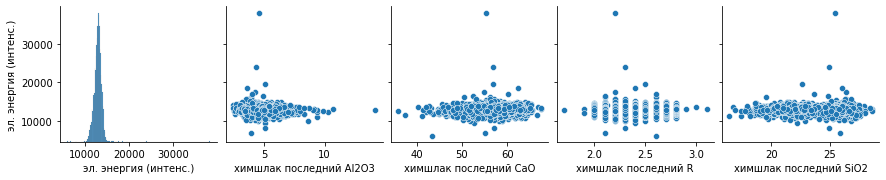

<Figure size 432x288 with 0 Axes>

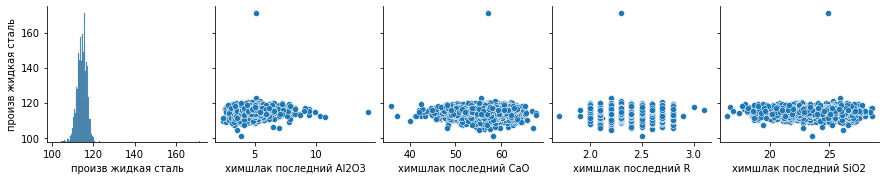

<Figure size 432x288 with 0 Axes>

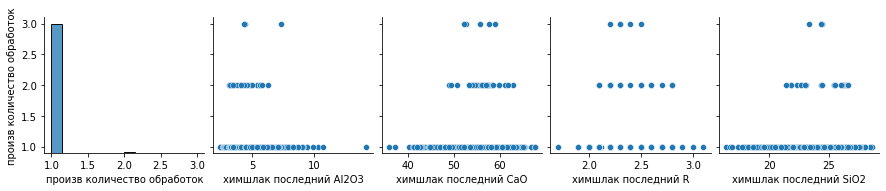

<Figure size 432x288 with 0 Axes>

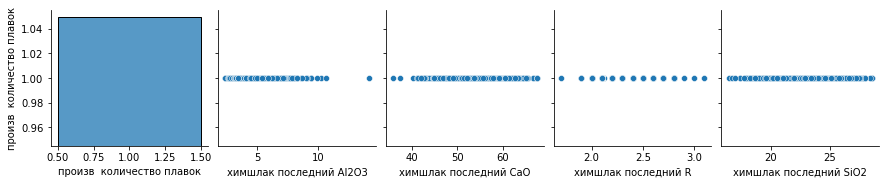

<Figure size 432x288 with 0 Axes>

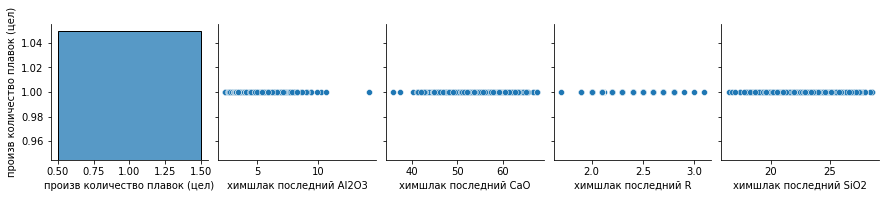

<Figure size 432x288 with 0 Axes>

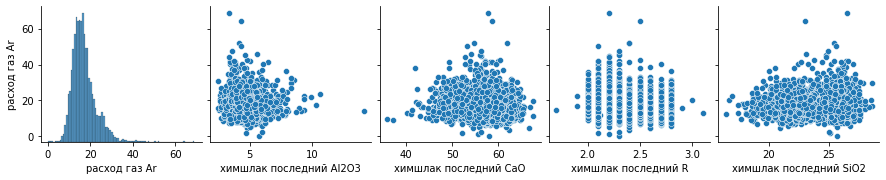

<Figure size 432x288 with 0 Axes>

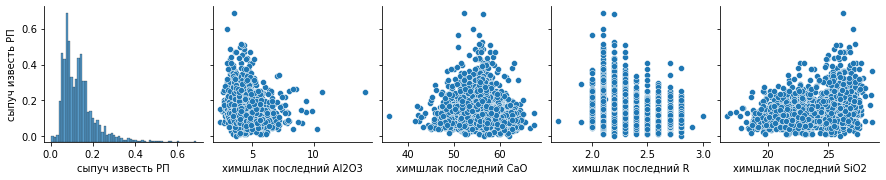

<Figure size 432x288 with 0 Axes>

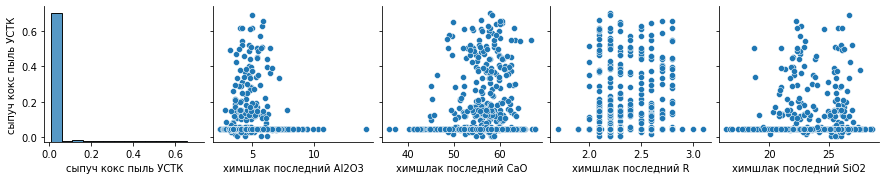

<Figure size 432x288 with 0 Axes>

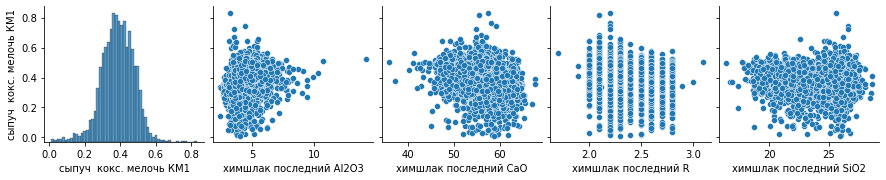

<Figure size 432x288 with 0 Axes>

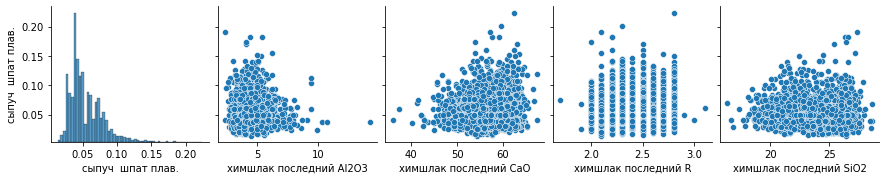

<Figure size 432x288 with 0 Axes>

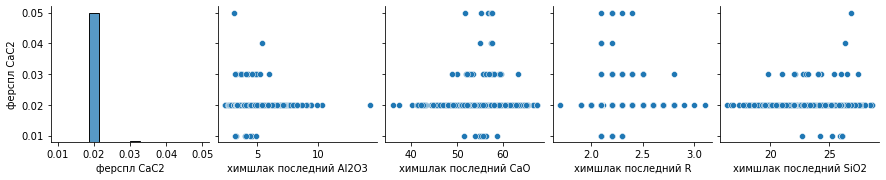

<Figure size 432x288 with 0 Axes>

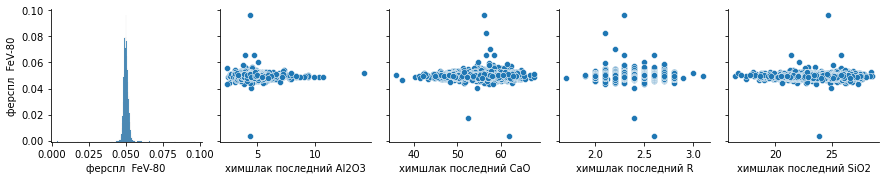

<Figure size 432x288 with 0 Axes>

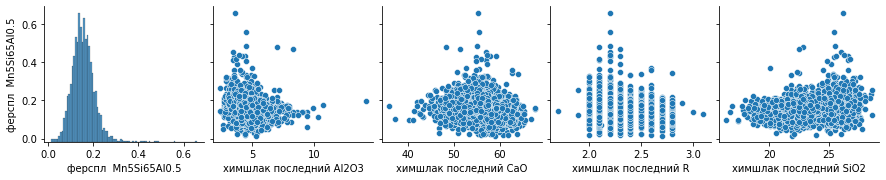

<Figure size 432x288 with 0 Axes>

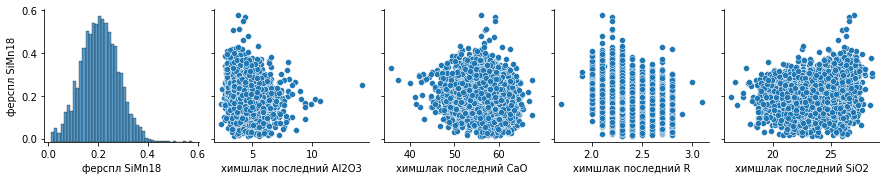

<Figure size 432x288 with 0 Axes>

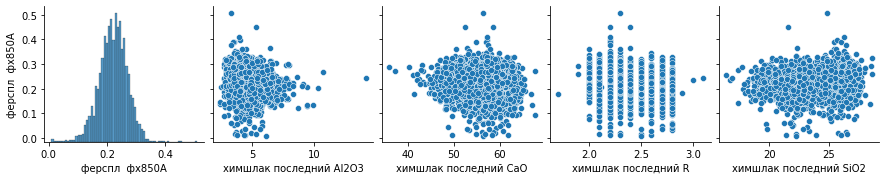

<Figure size 432x288 with 0 Axes>

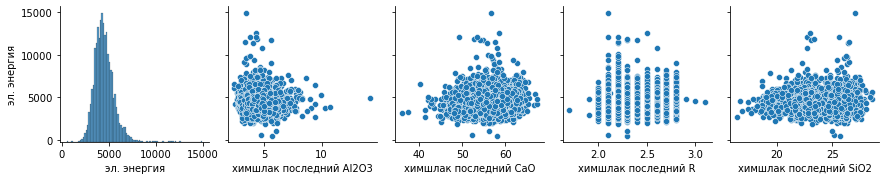

<Figure size 432x288 with 0 Axes>

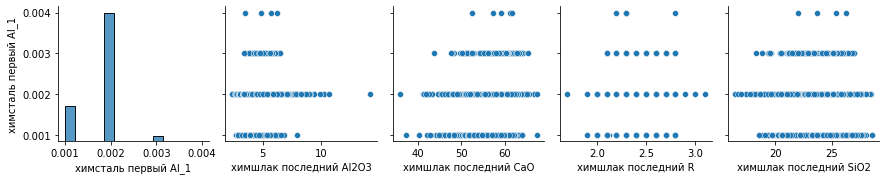

<Figure size 432x288 with 0 Axes>

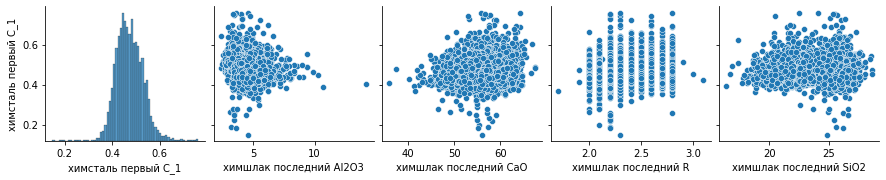

<Figure size 432x288 with 0 Axes>

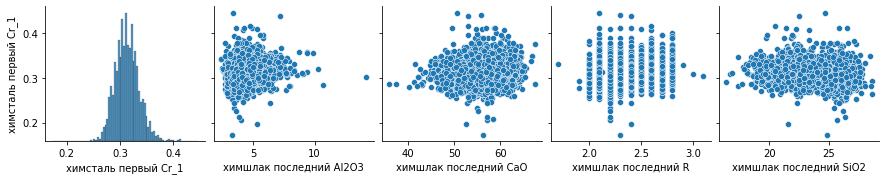

<Figure size 432x288 with 0 Axes>

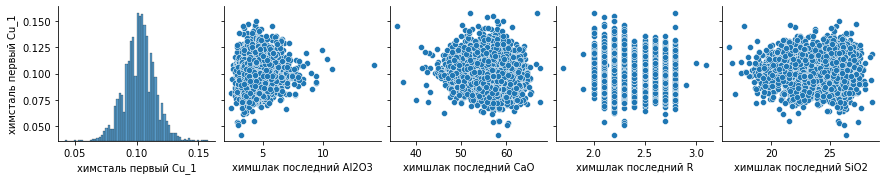

<Figure size 432x288 with 0 Axes>

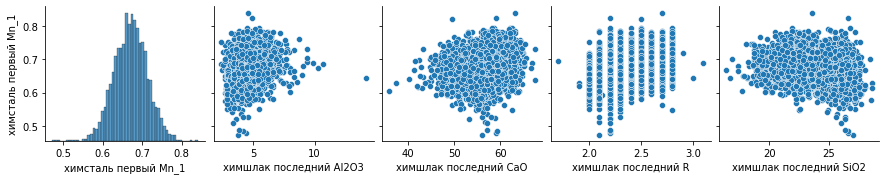

<Figure size 432x288 with 0 Axes>

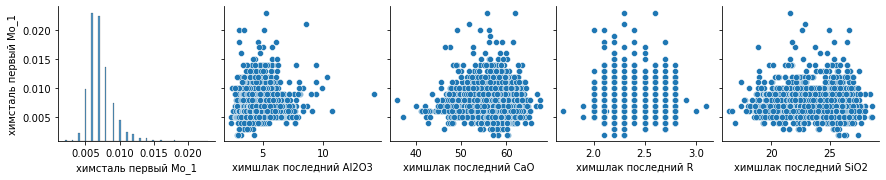

<Figure size 432x288 with 0 Axes>

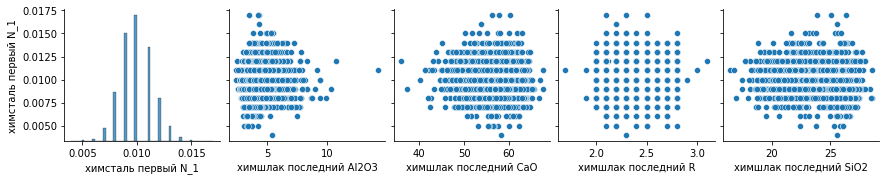

<Figure size 432x288 with 0 Axes>

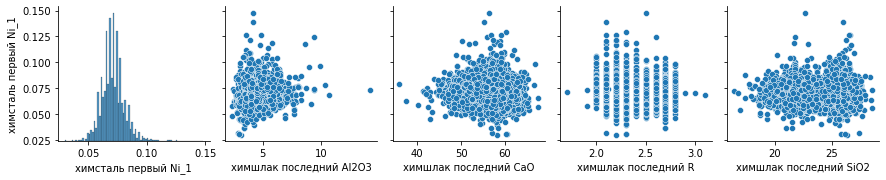

<Figure size 432x288 with 0 Axes>

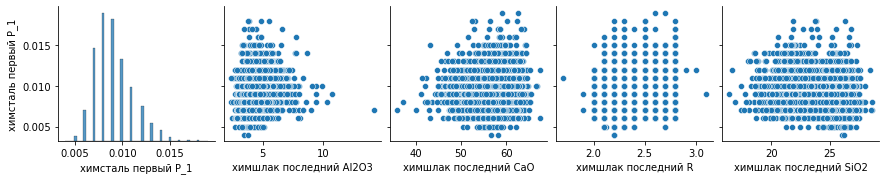

<Figure size 432x288 with 0 Axes>

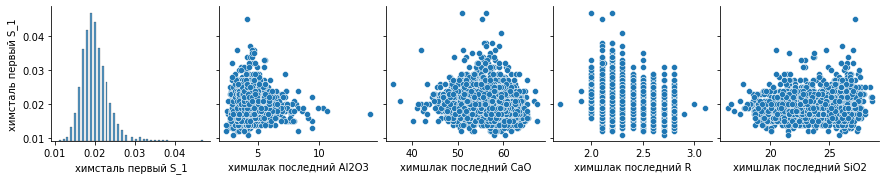

<Figure size 432x288 with 0 Axes>

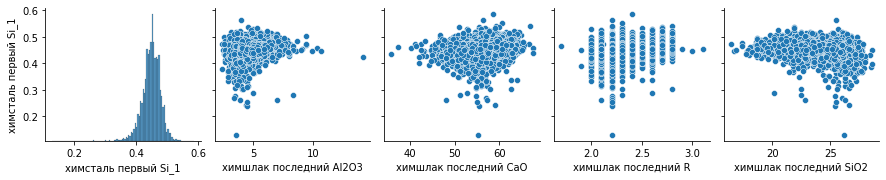

<Figure size 432x288 with 0 Axes>

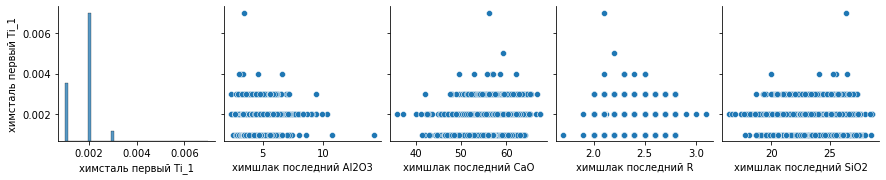

<Figure size 432x288 with 0 Axes>

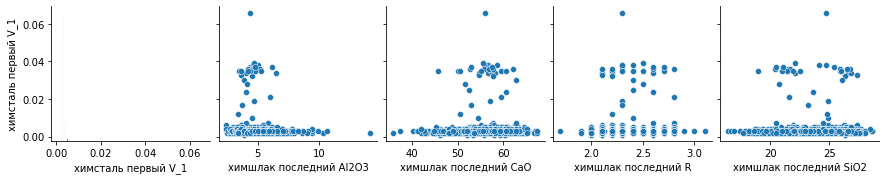

<Figure size 432x288 with 0 Axes>

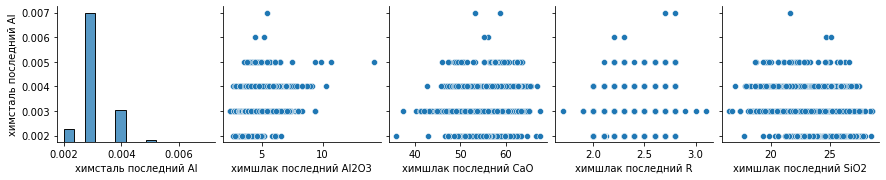

<Figure size 432x288 with 0 Axes>

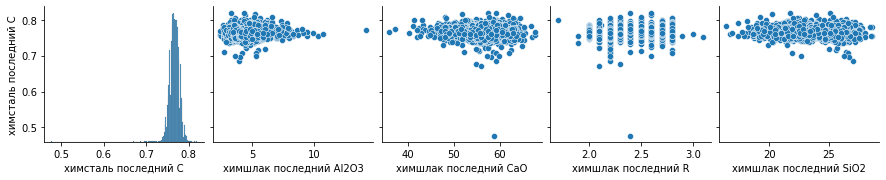

<Figure size 432x288 with 0 Axes>

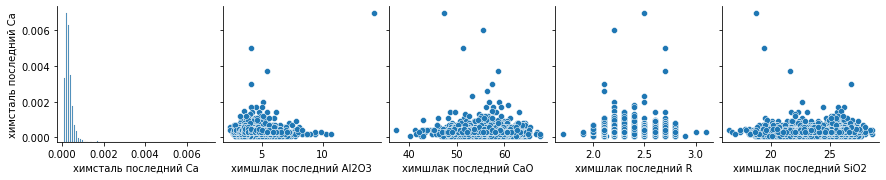

<Figure size 432x288 with 0 Axes>

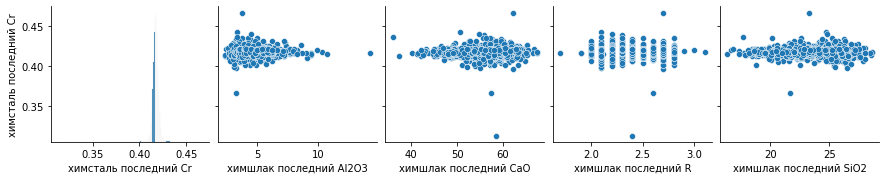

<Figure size 432x288 with 0 Axes>

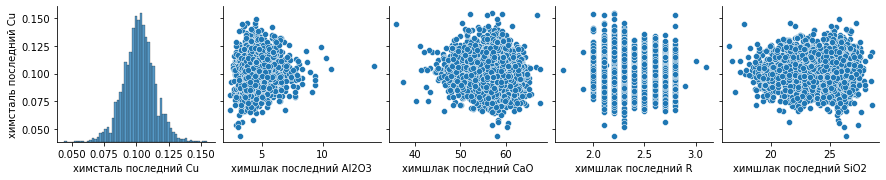

<Figure size 432x288 with 0 Axes>

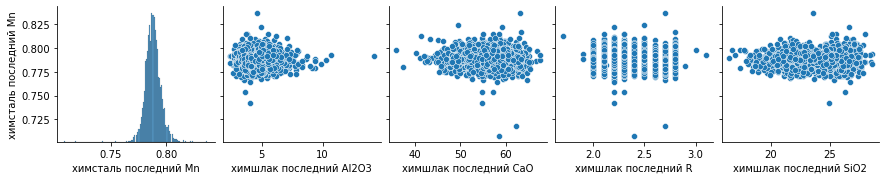

<Figure size 432x288 with 0 Axes>

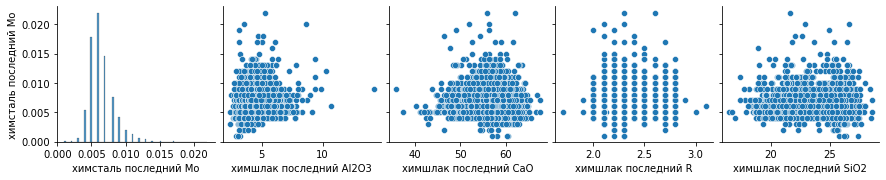

<Figure size 432x288 with 0 Axes>

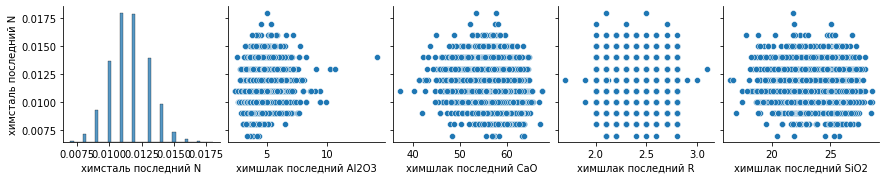

<Figure size 432x288 with 0 Axes>

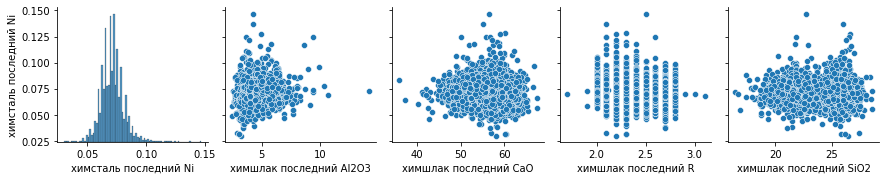

<Figure size 432x288 with 0 Axes>

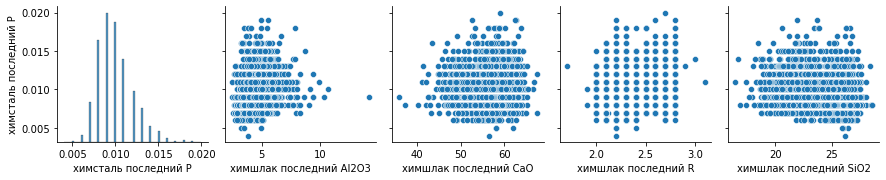

<Figure size 432x288 with 0 Axes>

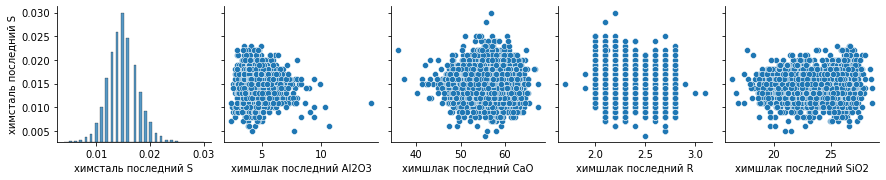

<Figure size 432x288 with 0 Axes>

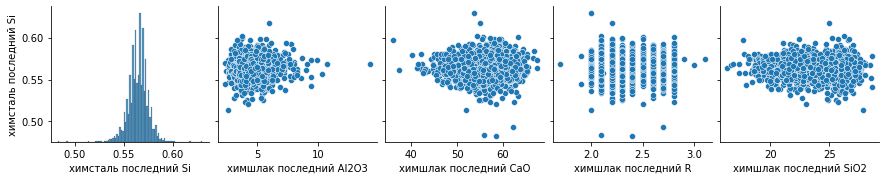

<Figure size 432x288 with 0 Axes>

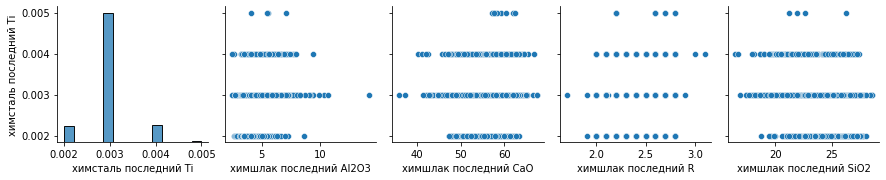

<Figure size 432x288 with 0 Axes>

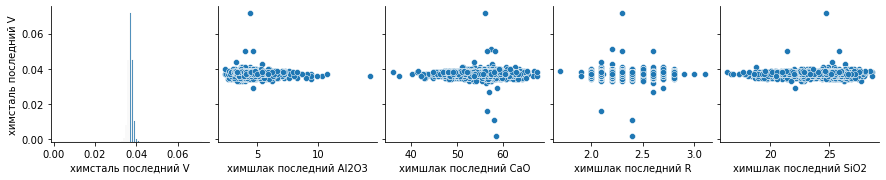

<Figure size 432x288 with 0 Axes>

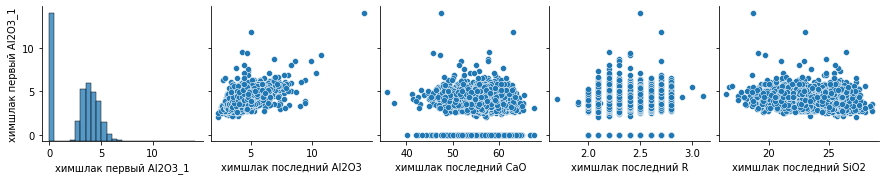

<Figure size 432x288 with 0 Axes>

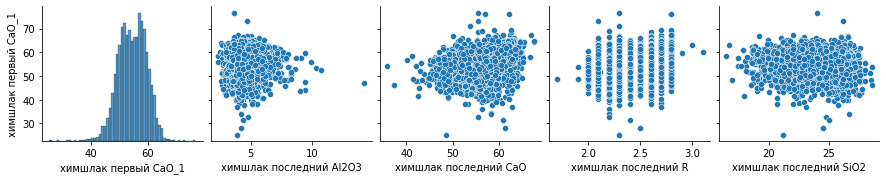

<Figure size 432x288 with 0 Axes>

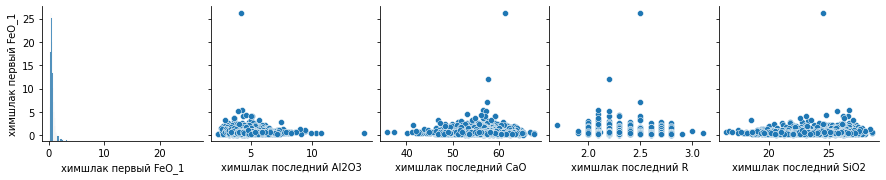

<Figure size 432x288 with 0 Axes>

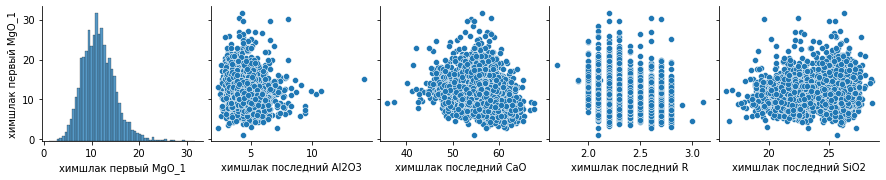

<Figure size 432x288 with 0 Axes>

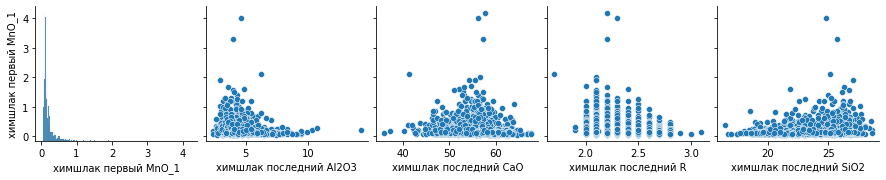

<Figure size 432x288 with 0 Axes>

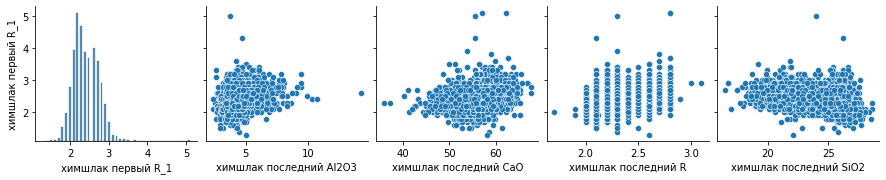

<Figure size 432x288 with 0 Axes>

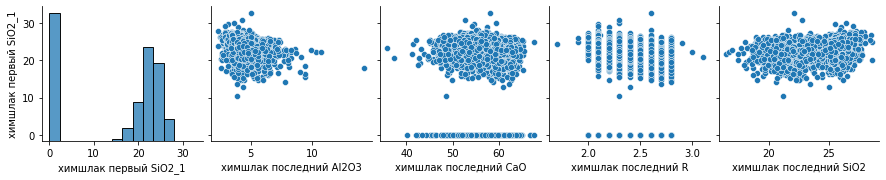

<Figure size 432x288 with 0 Axes>

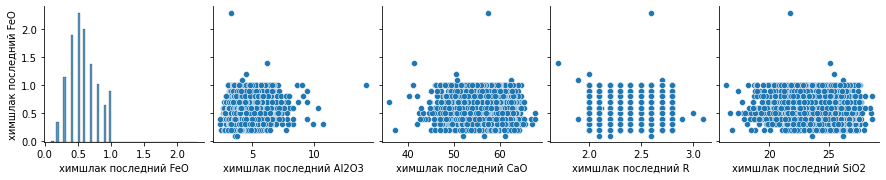

<Figure size 432x288 with 0 Axes>

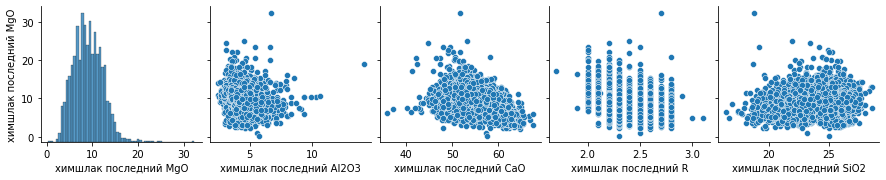

<Figure size 432x288 with 0 Axes>

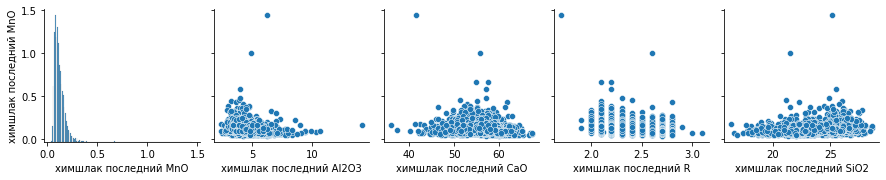

In [247]:
for i in range(66):
    plt.figure()
    sns.pairplot(df[[NUMERICAL[i]]+TARGETS], y_vars=NUMERICAL[i])
    plt.show();